In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

load dataset

In [2]:
train=pd.read_csv('/content/drive/MyDrive/dataset/demand-forecasting-kernels-only/train.csv')

In [3]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
test=pd.read_csv('/content/drive/MyDrive/dataset/demand-forecasting-kernels-only/test.csv')

In [5]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


Check for null values if any

In [6]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

what type distribution is sales feature?

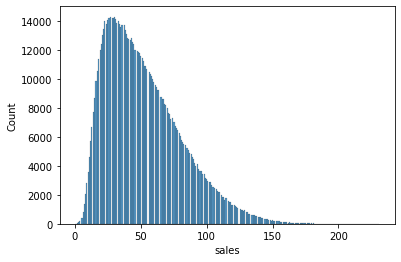

In [7]:
sns.histplot(train['sales'])

Is there any outliers?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


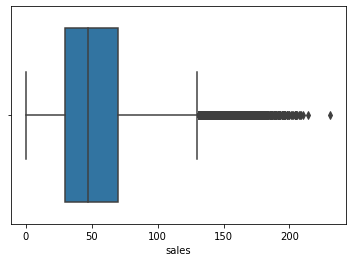

In [8]:
sns.boxplot(train['sales'])

maximum value in sales

In [9]:
max(train['sales'])

231

min value of sales

In [113]:
min(train['sales'])

0

In [10]:
train.shape

(913000, 4)

In [11]:
train['sales'].unique()

array([ 13,  11,  14,  10,  12,   9,   7,   5,  16,  18,  15,   8,   6,
        21,  20,  17,  22,  19,  24,  23,  26,  25,  27,  38,  34,  29,
        31,  30,   4,  36,  28,  33,  32,  37,  35,  43,  40,  41,  39,
        42,  50,  45,  44,  47,  53,  49,  46,  48,  51,  58,  54,  57,
        55,  52,   3,   2,   1,  59,  56,  60,  63,  69,  64,  67,  65,
        71,  61,  73,  62,  82,  78,  68,  74,  70,  87,  66,  77,  88,
        76,  75, 102,  72,  92,  86,  79,  85,  81,  90,  84,  80, 103,
        97,  96,  95,  89, 104,  94, 100,  91,  83, 106, 101,  98, 115,
        93, 111, 119,  99, 108, 110, 120, 105, 126, 109, 114, 113, 112,
       121, 107, 117, 118, 139, 124, 131, 123, 138, 134, 127, 136, 116,
       125, 122, 128, 150, 129, 135, 137, 132, 133, 145, 130, 144,   0,
       148, 141, 140, 152, 147, 169, 156, 159, 153, 142, 157, 155, 163,
       143, 154, 165, 146, 160, 158, 151, 164, 171, 161, 177, 162, 175,
       181, 168, 167, 149, 174, 170, 176, 178, 166, 173, 187, 18

median value in sales

In [12]:
np.median(train['sales'])

47.0

how many stores are there?

In [13]:
train['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

how many items are there?

In [14]:
train['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [15]:
train['date']

0         2013-01-01
1         2013-01-02
2         2013-01-03
3         2013-01-04
4         2013-01-05
             ...    
912995    2017-12-27
912996    2017-12-28
912997    2017-12-29
912998    2017-12-30
912999    2017-12-31
Name: date, Length: 913000, dtype: object

In [16]:
data=train.copy()

convert given date to day ,month and year 
then convert date to datetime and get weekday and weekday name

In [17]:
data['day']=pd.DatetimeIndex(data['date']).day


In [123]:
test['day']=pd.DatetimeIndex(test['date']).day

In [74]:
data['year']=pd.DatetimeIndex(data['date']).year
data['month']=pd.DatetimeIndex(data['date']).month


In [124]:
test['year']=pd.DatetimeIndex(test['date']).year
test['month']=pd.DatetimeIndex(test['date']).month


In [76]:
data['datetime'] = pd.to_datetime(data['date'], format="%Y/%m/%d")

data['weekday']=data['datetime'].dt.weekday

data['weekday_name'] = data['datetime'].dt.day_name()

In [125]:
test['datetime'] = pd.to_datetime(test['date'], format="%Y/%m/%d")

test['weekday']=test['datetime'].dt.weekday

test['weekday_name'] = test['datetime'].dt.day_name()

In [126]:
test.head()

,id,date,store,item,day,year,month,datetime,weekday,weekday_name
0,0,2018-01-01,1,1,1,2018,1,2018-01-01,0,Monday
1,1,2018-01-02,1,1,2,2018,1,2018-01-02,1,Tuesday
2,2,2018-01-03,1,1,3,2018,1,2018-01-03,2,Wednesday
3,3,2018-01-04,1,1,4,2018,1,2018-01-04,3,Thursday
4,4,2018-01-05,1,1,5,2018,1,2018-01-05,4,Friday


In [77]:
data.head()

,date,store,item,sales,day,year,month,datetime,weekday,weekday_name
0,2013-01-01,1,1,13,1,2013,1,2013-01-01,1,Tuesday
1,2013-01-02,1,1,11,2,2013,1,2013-01-02,2,Wednesday
2,2013-01-03,1,1,14,3,2013,1,2013-01-03,3,Thursday
3,2013-01-04,1,1,13,4,2013,1,2013-01-04,4,Friday
4,2013-01-05,1,1,10,5,2013,1,2013-01-05,5,Saturday


In [127]:
data.describe()

,store,item,sales,day,year,month,weekday
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,15.727820,2015.000548,6.523549,3.001643
std,2.872283,14.430878,28.801144,8.799329,1.414021,3.448535,1.999316
min,1.000000,1.000000,0.000000,1.000000,2013.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000,8.000000,2014.000000,4.000000,1.000000
50%,5.500000,25.500000,47.000000,16.000000,2015.000000,7.000000,3.000000
75%,8.000000,38.000000,70.000000,23.000000,2016.000000,10.000000,5.000000
max,10.000000,50.000000,231.000000,31.000000,2017.000000,12.000000,6.000000


find how the sales have changed yearly from 2013 to 2017

In [78]:
data.loc[data['year']==2013,'sales'].sum()

7941243

In [79]:
data.loc[data['year']==2014,'sales'].sum()

9135482

In [80]:
data.loc[data['year']==2015,'sales'].sum()

9536887

In [81]:
data.loc[data['year']==2016,'sales'].sum()

10357160

In [82]:
data.loc[data['year']==2017,'sales'].sum()

10733740

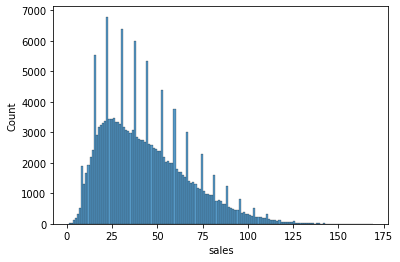

In [83]:
sns.histplot(data.loc[data['year']==2013,'sales'])

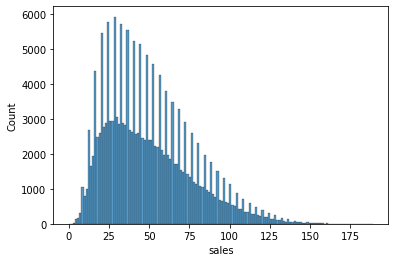

In [84]:
sns.histplot(data.loc[data['year']==2014,'sales'])

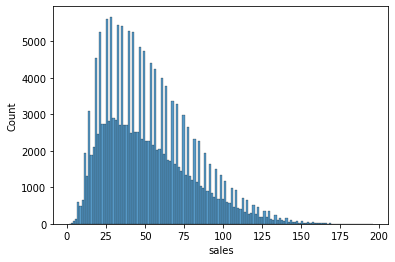

In [85]:
sns.histplot(data.loc[data['year']==2015,'sales'])

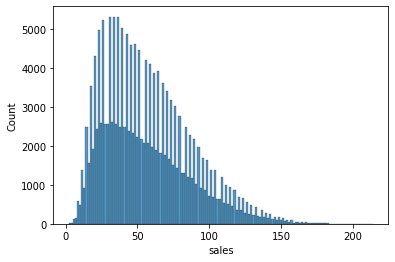

In [86]:
sns.histplot(data.loc[data['year']==2016,'sales'])

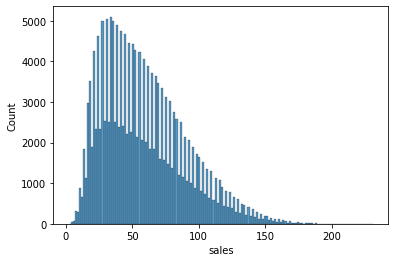

In [87]:
sns.histplot(data.loc[data['year']==2017,'sales'])

below grouping shows that most of the sales were done on friday ,saturday and sunday

In [91]:
data.groupby('weekday_name')['sales'].mean()

weekday_name
Friday       55.157249
Monday       41.429638
Saturday     58.662697
Sunday       62.143333
Thursday     51.723218
Tuesday      48.225908
Wednesday    48.368506
Name: sales, dtype: float64

In [115]:
data.groupby('store')['sales'].mean()

store
1     47.268379
2     67.033165
3     59.530602
4     54.902946
5     39.770164
6     39.733516
7     36.363735
8     64.142048
9     55.049025
10    58.709288
Name: sales, dtype: float64

So above we can see that stores 2,3,4,8,9,10 had somewhat better sales then other stores.

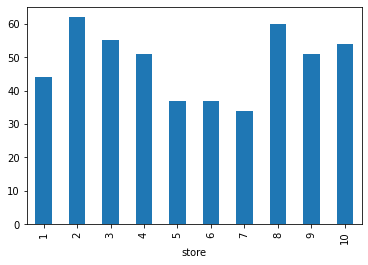

In [114]:
data.groupby('store')['sales'].median().plot.bar()
plt.show()

to have better idea on sales yearly on separate weekdays

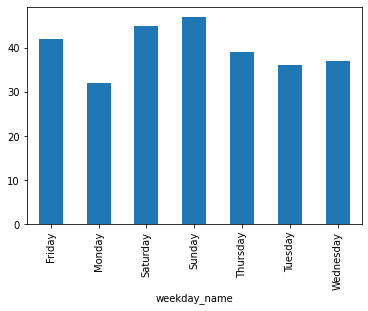

In [96]:
yr_2013=data.loc[data['year']==2013]
yr_2013.groupby('weekday_name')['sales'].median().plot.bar()
plt.show()

In [103]:
yr_2013.groupby('weekday_name')['sales'].mean()

weekday_name
Friday       46.142192
Monday       34.539385
Saturday     49.065808
Sunday       51.576885
Thursday     43.006385
Tuesday      40.031623
Wednesday    40.300308
Name: sales, dtype: float64

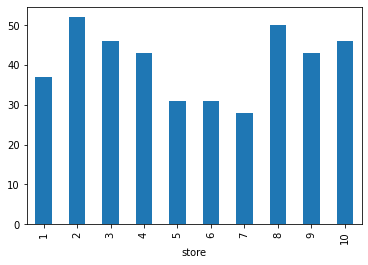

In [116]:
yr_2013.groupby('store')['sales'].median().plot.bar()
plt.show()

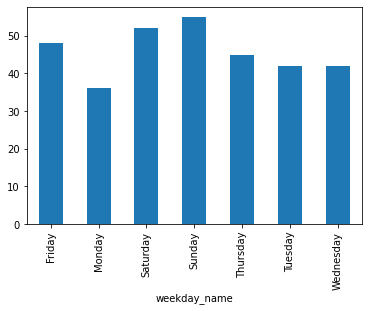

In [97]:
yr_2014=data.loc[data['year']==2014]
yr_2014.groupby('weekday_name')['sales'].median().plot.bar()
plt.show()

In [106]:
yr_2014.groupby('weekday_name')['sales'].mean()

weekday_name
Friday       52.689500
Monday       39.583962
Saturday     56.414846
Sunday       59.802000
Thursday     49.611769
Tuesday      46.358692
Wednesday    46.018943
Name: sales, dtype: float64

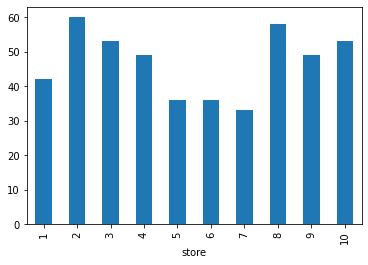

In [117]:
yr_2014.groupby('store')['sales'].median().plot.bar()
plt.show()

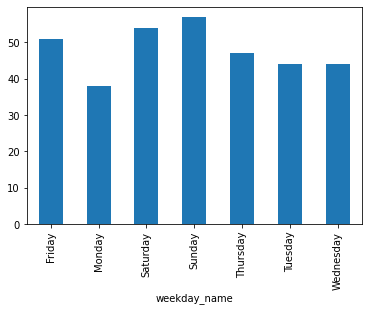

In [98]:
yr_2015=data.loc[data['year']==2015]
yr_2015.groupby('weekday_name')['sales'].median().plot.bar()
plt.show()

In [107]:
yr_2015.groupby('weekday_name')['sales'].mean()

weekday_name
Friday       55.281654
Monday       41.575808
Saturday     58.471192
Sunday       62.427808
Thursday     51.527358
Tuesday      48.179923
Wednesday    48.348692
Name: sales, dtype: float64

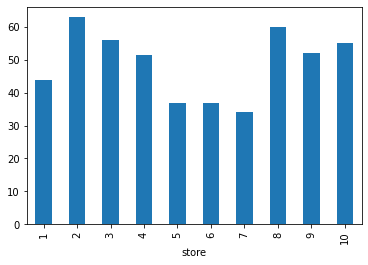

In [118]:
yr_2015.groupby('store')['sales'].median().plot.bar()
plt.show()

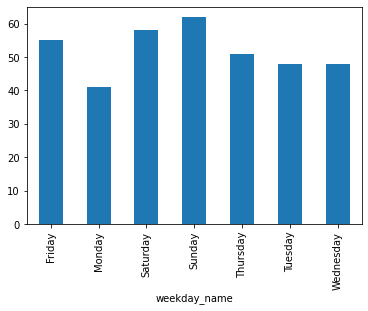

In [99]:
yr_2016=data.loc[data['year']==2016]
yr_2016.groupby('weekday_name')['sales'].median().plot.bar()
plt.show()

In [108]:
yr_2016.groupby('weekday_name')['sales'].mean()

weekday_name
Friday       59.640679
Monday       44.831038
Saturday     63.091585
Sunday       67.309038
Thursday     55.988077
Tuesday      52.497462
Wednesday    52.634192
Name: sales, dtype: float64

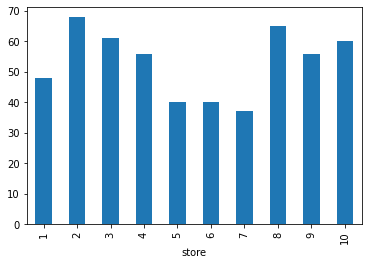

In [119]:
yr_2016.groupby('store')['sales'].median().plot.bar()
plt.show()

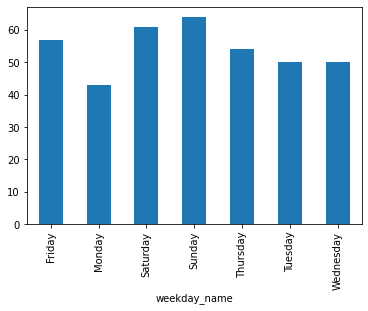

In [100]:
yr_2017=data.loc[data['year']==2017]
yr_2017.groupby('weekday_name')['sales'].median().plot.bar()
plt.show()

In [109]:
yr_2017.groupby('weekday_name')['sales'].mean()

weekday_name
Friday       61.946000
Monday       46.618000
Saturday     66.184885
Sunday       69.460226
Thursday     58.486269
Tuesday      54.219423
Wednesday    54.585577
Name: sales, dtype: float64

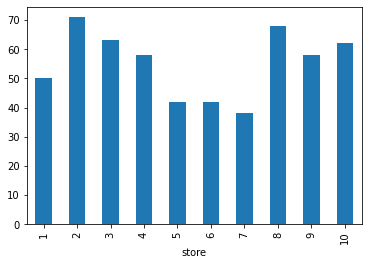

In [120]:
yr_2017.groupby('store')['sales'].median().plot.bar()
plt.show()

Do we have the same number of unique item in each store ?

In [128]:
data.groupby(["store"])["item"].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

How many each unique item has been sold in each store for 5 years


In [129]:
data.groupby(["store", "item"]).agg({"sales": ["sum"]})

sales
               sum
store item        
1     1      36468
      2      97050
      3      60638
      4      36440
      5      30335
...            ...
10    46    120601
      47     45204
      48    105570
      49     60317
      50    135192

[500 rows x 1 columns]

more descriptive statistics of the previous code

In [130]:
data.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
...            ...        ...    ...        ...
10    46    120601  66.046550   65.0  18.114991
      47     45204  24.755750   24.0   7.924820
      48    105570  57.814896   57.0  15.898538
      49     60317  33.032311   32.0  10.091610
      50    135192  74.037240   73.0  19.937566

[500 rows x 4 columns]

Calculate 25th and 75th percentile

In [111]:
np.percentile(data['sales'],[.25,.75])

array([7., 9.])

In [131]:
data.sort_values(by=['store', 'item', 'date'], axis=0, inplace=True)


In [132]:
data.head()

,date,store,item,sales,day,year,month,datetime,weekday,weekday_name
0,2013-01-01,1,1,13,1,2013,1,2013-01-01,1,Tuesday
1,2013-01-02,1,1,11,2,2013,1,2013-01-02,2,Wednesday
2,2013-01-03,1,1,14,3,2013,1,2013-01-03,3,Thursday
3,2013-01-04,1,1,13,4,2013,1,2013-01-04,4,Friday
4,2013-01-05,1,1,10,5,2013,1,2013-01-05,5,Saturday


In [135]:
data.to_csv('/content/drive/MyDrive/dataset/demand-forecasting-kernels-only/trained.csv',index=False)

In [136]:
test.to_csv('/content/drive/MyDrive/dataset/demand-forecasting-kernels-only/tested.csv',index=False)